# Classification Modeling

In [1]:
#Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [3]:
#Read in cleaned data
df = pd.read_csv('cleaned_well_data2.csv')

In [4]:
df.head()

Unnamed: 0     id  gps_height  longitude   latitude  permit  \
0           0  69572        1390  34.938093  -9.856322     0.0   
1           1   8776        1399  34.698766  -2.147466     1.0   
2           2  34310         686  37.460664  -3.821329     1.0   
3           3  67743         263  38.486161 -11.155298     1.0   
4           4  19728           0  31.130847  -1.825359     1.0   

   construction_year    status_group  no tsh  1+  ...  source_other  \
0             1999.0      functional       0   0  ...             0   
1             2010.0      functional       1   0  ...             0   
2             2009.0      functional       0   1  ...             0   
3             1986.0  non functional       1   0  ...             0   
4                NaN      functional       1   0  ...             0   

   source_rainwater harvesting  source_river/lake  source_shallow well  \
0                            0                  0                    0   
1                            1                  0                    0   
2                            0                  0                    0   
3                            0                  0                    0   
4                            1                  0                    0   

   source_spring  waterpoint_type_communal standpipe  waterpoint_type_dam  \
0              1                                   1                    0   
1              0                                   1                    0   
2              0                                   1                    0   
3              0                                   1                    0   
4              0                                   1                    0   

   waterpoint_type_hand pump  waterpoint_type_improved spring  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   waterpoint_type_other  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 120 columns]

In [5]:
df = df.drop(columns='Unnamed: 0', axis = 1)
df.head()

id  gps_height  longitude   latitude  permit  construction_year  \
0  69572        1390  34.938093  -9.856322     0.0             1999.0   
1   8776        1399  34.698766  -2.147466     1.0             2010.0   
2  34310         686  37.460664  -3.821329     1.0             2009.0   
3  67743         263  38.486161 -11.155298     1.0             1986.0   
4  19728           0  31.130847  -1.825359     1.0                NaN   

     status_group  no tsh  1+  100+  ...  source_other  \
0      functional       0   0     0  ...             0   
1      functional       1   0     0  ...             0   
2      functional       0   1     0  ...             0   
3  non functional       1   0     0  ...             0   
4      functional       1   0     0  ...             0   

   source_rainwater harvesting  source_river/lake  source_shallow well  \
0                            0                  0                    0   
1                            1                  0                    0   
2                            0                  0                    0   
3                            0                  0                    0   
4                            1                  0                    0   

   source_spring  waterpoint_type_communal standpipe  waterpoint_type_dam  \
0              1                                   1                    0   
1              0                                   1                    0   
2              0                                   1                    0   
3              0                                   1                    0   
4              0                                   1                    0   

   waterpoint_type_hand pump  waterpoint_type_improved spring  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   waterpoint_type_other  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 119 columns]

In [6]:
df.isna().sum()

id                                       0
gps_height                               0
longitude                             1812
latitude                              1812
permit                                3056
                                      ... 
waterpoint_type_communal standpipe       0
waterpoint_type_dam                      0
waterpoint_type_hand pump                0
waterpoint_type_improved spring          0
waterpoint_type_other                    0
Length: 119, dtype: int64

In [7]:
df['permit'].replace(np.nan, 0, inplace=True)

In [8]:
df['construction_year'].mean()

1996.8146855857951

In [9]:
df['construction_year'].replace(np.nan, 1997, inplace=True)

In [10]:
import plotly.express as px
default_public_token = 'pk.eyJ1IjoiYnNhbWFoYSIsImEiOiJja2M5OHZrYmIwMXZhMnNtdXB3Ynl1bW45In0.T9VEPlgv1PVatWdX_R27dQ'
px.set_mapbox_access_token(default_public_token)
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color="status_group"  
                        )
fig.show()

In [11]:
#Split into X and y
X = df.drop(columns=['id','status_group', 'latitude', 'longitude'], axis=1)
X.head()

gps_height  permit  construction_year  no tsh  1+  100+  1000+  \
0        1390     0.0             1999.0       0   0     0      1   
1        1399     1.0             2010.0       1   0     0      0   
2         686     1.0             2009.0       0   1     0      0   
3         263     1.0             1986.0       1   0     0      0   
4           0     1.0             1997.0       1   0     0      0   

   top_funder_Government Of Tanzania  top_funder_Hesawa  top_funder_Kkkt  ...  \
0                                  0                  0                0  ...   
1                                  0                  0                0  ...   
2                                  0                  0                0  ...   
3                                  0                  0                0  ...   
4                                  0                  0                0  ...   

   source_other  source_rainwater harvesting  source_river/lake  \
0             0                            0                  0   
1             0                            1                  0   
2             0                            0                  0   
3             0                            0                  0   
4             0                            1                  0   

   source_shallow well  source_spring  waterpoint_type_communal standpipe  \
0                    0              1                                   1   
1                    0              0                                   1   
2                    0              0                                   1   
3                    0              0                                   1   
4                    0              0                                   1   

   waterpoint_type_dam  waterpoint_type_hand pump  \
0                    0                          0   
1                    0                          0   
2                    0                          0   
3                    0                          0   
4                    0                          0   

   waterpoint_type_improved spring  waterpoint_type_other  
0                                0                      0  
1                                0                      0  
2                                0                      0  
3                                0                      0  
4                                0                      0  

[5 rows x 115 columns]

In [12]:
y = df['status_group']
y.head()

0        functional
1        functional
2        functional
3    non functional
4        functional
Name: status_group, dtype: object

In [13]:
y.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [14]:
y = y.replace('functional', 1)
y.head()

0                 1
1                 1
2                 1
3    non functional
4                 1
Name: status_group, dtype: object

In [15]:
y = y.replace('non functional', 2)

In [16]:
y = y.replace('functional needs repair', 3)

In [17]:
y.isna().sum()

0

In [18]:
X.isna().sum()

gps_height                            0
permit                                0
construction_year                     0
no tsh                                0
1+                                    0
                                     ..
waterpoint_type_communal standpipe    0
waterpoint_type_dam                   0
waterpoint_type_hand pump             0
waterpoint_type_improved spring       0
waterpoint_type_other                 0
Length: 115, dtype: int64

## Boruta Feature Selection

In [19]:
#Using Boruta for feature selection

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

###initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['gps_height', 'construction_year', 'no tsh', '1+', 'top_funder_Government Of Tanzania', 'top_funder_Rwssp', 'top_installer_DWE', 'top_installer_Government', 'top_installer_Other', 'top_installer_RWE', 'basin_Lake Nyasa', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Ruvuma / Southern Coast', 'region_Iringa', 'region_Kagera', 'region_Kigoma', 'region_Kilimanjaro', 'region_Mwanza', 'region_Shinyanga', 'region_Tanga', 'top_lga_Bariadi', 'population_under 1000', 'top_scheme_management_Other', 'top_scheme_management_WUA', 'top_scheme_management_Water Board', 'top_scheme_management_Water authority', 'extraction_type_gravity', 'extraction_type_other', 'extraction_type_submersible', 'payment_never pay', 'payment_unknown', 'quality_milky', 'quantity_enough', 'quantity_insufficient', 'quantity_seasonal', 'quantity_unknown', 'source_rainwater harvesting', 'source_river/lake', 'source_shallow well', 'source_spring', 'waterpoint_type_communal standpipe', 'waterpoint_ty

In [20]:
len(green_area)

43

In [21]:
X2 = df[green_area]
X2.head()

gps_height  construction_year  no tsh  1+  \
0        1390             1999.0       0   0   
1        1399             2010.0       1   0   
2         686             2009.0       0   1   
3         263             1986.0       1   0   
4           0             1997.0       1   0   

   top_funder_Government Of Tanzania  top_funder_Rwssp  top_installer_DWE  \
0                                  0                 0                  0   
1                                  0                 0                  0   
2                                  0                 0                  0   
3                                  0                 0                  0   
4                                  0                 0                  0   

   top_installer_Government  top_installer_Other  top_installer_RWE  ...  \
0                         0                    1                  0  ...   
1                         0                    1                  0  ...   
2                         0                    1                  0  ...   
3                         0                    1                  0  ...   
4                         0                    1                  0  ...   

   quantity_enough  quantity_insufficient  quantity_seasonal  \
0                1                      0                  0   
1                0                      1                  0   
2                1                      0                  0   
3                0                      0                  0   
4                0                      0                  1   

   quantity_unknown  source_rainwater harvesting  source_river/lake  \
0                 0                            0                  0   
1                 0                            1                  0   
2                 0                            0                  0   
3                 0                            0                  0   
4                 0                            1                  0   

   source_shallow well  source_spring  waterpoint_type_communal standpipe  \
0                    0              1                                   1   
1                    0              0                                   1   
2                    0              0                                   1   
3                    0              0                                   1   
4                    0              0                                   1   

   waterpoint_type_other  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 43 columns]

In [22]:
y2 = df['status_group']
y2.head()

0        functional
1        functional
2        functional
3    non functional
4        functional
Name: status_group, dtype: object

# Logistic Regression

In [23]:
#Normalize the data
X2 = X2.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X2.head()

gps_height  construction_year  no tsh   1+  \
0    0.517483           0.735849     0.0  0.0   
1    0.520629           0.943396     1.0  0.0   
2    0.271329           0.924528     0.0  1.0   
3    0.123427           0.490566     1.0  0.0   
4    0.031469           0.698113     1.0  0.0   

   top_funder_Government Of Tanzania  top_funder_Rwssp  top_installer_DWE  \
0                                0.0               0.0                0.0   
1                                0.0               0.0                0.0   
2                                0.0               0.0                0.0   
3                                0.0               0.0                0.0   
4                                0.0               0.0                0.0   

   top_installer_Government  top_installer_Other  top_installer_RWE  ...  \
0                       0.0                  1.0                0.0  ...   
1                       0.0                  1.0                0.0  ...   
2                       0.0                  1.0                0.0  ...   
3                       0.0                  1.0                0.0  ...   
4                       0.0                  1.0                0.0  ...   

   quantity_enough  quantity_insufficient  quantity_seasonal  \
0              1.0                    0.0                0.0   
1              0.0                    1.0                0.0   
2              1.0                    0.0                0.0   
3              0.0                    0.0                0.0   
4              0.0                    0.0                1.0   

   quantity_unknown  source_rainwater harvesting  source_river/lake  \
0               0.0                          0.0                0.0   
1               0.0                          1.0                0.0   
2               0.0                          0.0                0.0   
3               0.0                          0.0                0.0   
4               0.0                          1.0                0.0   

   source_shallow well  source_spring  waterpoint_type_communal standpipe  \
0                  0.0            1.0                                 1.0   
1                  0.0            0.0                                 1.0   
2                  0.0            0.0                                 1.0   
3                  0.0            0.0                                 1.0   
4                  0.0            0.0                                 1.0   

   waterpoint_type_other  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 43 columns]

In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

/Users/davidcuervo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Check the score
logreg.score(X_test, y_test)

0.7166329966329966

In [27]:
#Trying logistic regression again with the green and blue areas from Boruta
df_blue = df[blue_area]
df_blue.head()

top_funder_World Bank  basin_Lake Tanganyika  region_Mtwara  top_lga_Other
0                      0                      0              0              1
1                      0                      0              0              1
2                      0                      0              0              1
3                      0                      0              1              1
4                      0                      0              0              1

In [28]:
#Normalize the data
df_blue = df_blue.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
df_blue.head()

top_funder_World Bank  basin_Lake Tanganyika  region_Mtwara  top_lga_Other
0                    0.0                    0.0            0.0            1.0
1                    0.0                    0.0            0.0            1.0
2                    0.0                    0.0            0.0            1.0
3                    0.0                    0.0            1.0            1.0
4                    0.0                    0.0            0.0            1.0

In [29]:
X3 = pd.concat([X2, df_blue], axis=1)
X3.head()

gps_height  construction_year  no tsh   1+  \
0    0.517483           0.735849     0.0  0.0   
1    0.520629           0.943396     1.0  0.0   
2    0.271329           0.924528     0.0  1.0   
3    0.123427           0.490566     1.0  0.0   
4    0.031469           0.698113     1.0  0.0   

   top_funder_Government Of Tanzania  top_funder_Rwssp  top_installer_DWE  \
0                                0.0               0.0                0.0   
1                                0.0               0.0                0.0   
2                                0.0               0.0                0.0   
3                                0.0               0.0                0.0   
4                                0.0               0.0                0.0   

   top_installer_Government  top_installer_Other  top_installer_RWE  ...  \
0                       0.0                  1.0                0.0  ...   
1                       0.0                  1.0                0.0  ...   
2                       0.0                  1.0                0.0  ...   
3                       0.0                  1.0                0.0  ...   
4                       0.0                  1.0                0.0  ...   

   source_rainwater harvesting  source_river/lake  source_shallow well  \
0                          0.0                0.0                  0.0   
1                          1.0                0.0                  0.0   
2                          0.0                0.0                  0.0   
3                          0.0                0.0                  0.0   
4                          1.0                0.0                  0.0   

   source_spring  waterpoint_type_communal standpipe  waterpoint_type_other  \
0            1.0                                 1.0                    0.0   
1            0.0                                 1.0                    0.0   
2            0.0                                 1.0                    0.0   
3            0.0                                 1.0                    0.0   
4            0.0                                 1.0                    0.0   

   top_funder_World Bank  basin_Lake Tanganyika  region_Mtwara  top_lga_Other  
0                    0.0                    0.0            0.0            1.0  
1                    0.0                    0.0            0.0            1.0  
2                    0.0                    0.0            0.0            1.0  
3                    0.0                    0.0            1.0            1.0  
4                    0.0                    0.0            0.0            1.0  

[5 rows x 47 columns]

In [30]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X3, y2, random_state=0)

In [31]:
# Fit the model
logreg.fit(X2_train, y2_train)

/Users/davidcuervo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
logreg.score(X2_test, y2_test)

0.7241077441077441

# Decision Tree

In [32]:
#Starting with just the green_area columns
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [33]:
# Make predictions for test data
y_pred = classifier.predict(X_test) 

In [34]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :75.41414141414141

Confusion Matrix
----------------


Predicted                functional  functional needs repair  non functional  \
True                                                                           
functional                     6714                      359             949   
functional needs repair         587                      348             176   
non functional                 1412                      168            4137   
All                            8713                      875            5262   

Predicted                  All  
True                            
functional                8022  
functional needs repair   1111  
non functional            5717  
All                      14850

In [35]:
#See if the accuracy goes up with the blue columns added
classifier2 = DecisionTreeClassifier(random_state=10)  
classifier2.fit(X2_train, y2_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [36]:
y2_pred = classifier2.predict(X2_test) 

In [37]:
acc = accuracy_score(y2_test,y2_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y2_test, y2_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :75.27946127946127

Confusion Matrix
----------------


Predicted                functional  functional needs repair  non functional  \
True                                                                           
functional                     6682                      374             966   
functional needs repair         586                      345             180   
non functional                 1397                      168            4152   
All                            8665                      887            5298   

Predicted                  All  
True                            
functional                8022  
functional needs repair   1111  
non functional            5717  
All                      14850

In [ ]:
#Most accurate with green columns only

# Random Forrest

In [38]:
# Instantiate and fit a RandomForestClassifier using green columns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
#Test accuracy 
forest.score(X_train, y_train)

0.6784511784511784

In [40]:
forest.score(X_test, y_test)

0.674949494949495

In [41]:
#Trying again with green and blue columns
forest2 = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest2.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
forest2.score(X2_train, y2_train)

0.6922334455667789

In [43]:
forest2.score(X2_test, y2_test)

0.6880808080808081

## Most accurate classification is the decision tree

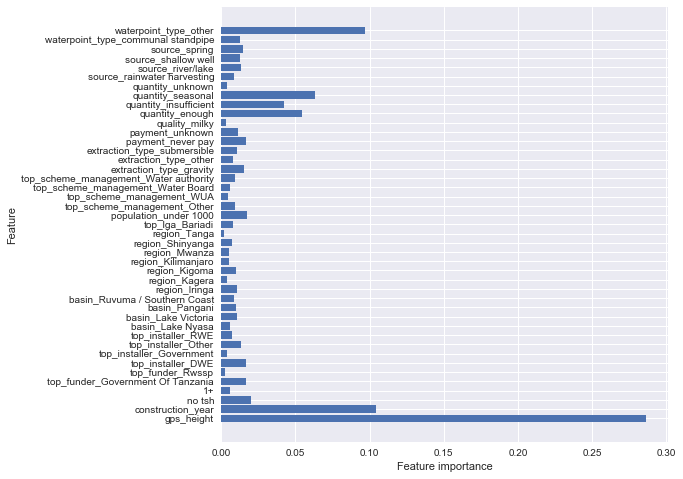

In [44]:
#See which features are most important in the model
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(classifier)

In [ ]:
#look into some variables, see visualizations on how they relate to each status group category

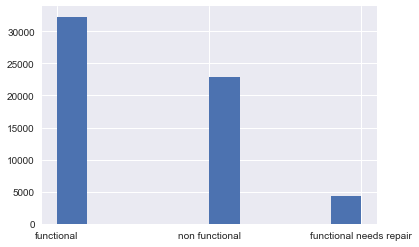

In [63]:
df['status_group'].hist()

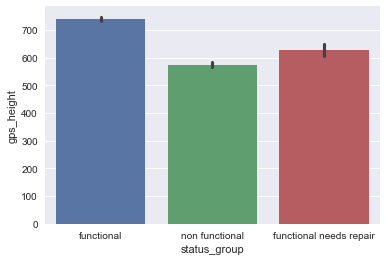

In [50]:
#GPS Height and Well function
sns.barplot(x='status_group', y='gps_height', data=df)

In [51]:
df.groupby('status_group').gps_height.mean()

status_group
functional                 740.131188
functional needs repair    627.607135
non functional             574.464774
Name: gps_height, dtype: float64

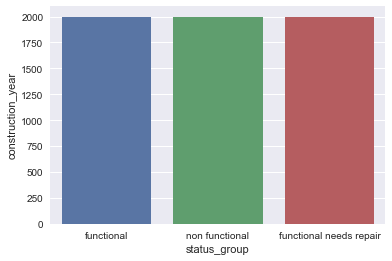

In [65]:
sns.barplot(x='status_group', y='construction_year', data=df)

In [56]:
#Construction Year and GPS Height
df.groupby('status_group').construction_year.mean()

status_group
functional                 1998.977154
functional needs repair    1995.979847
non functional             1994.084341
Name: construction_year, dtype: float64

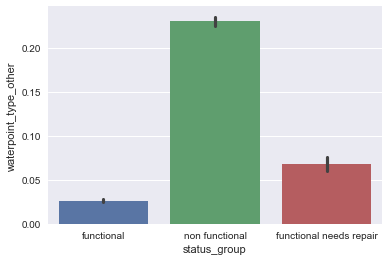

In [66]:
sns.barplot(x='status_group', y='waterpoint_type_other', data=df)